# مشروع تحليل بيانات تصاريح تطبيق نُسُك لعام ١٤٤٤هـ 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import arabic_reshaper
from bidi.algorithm import get_display

In [2]:
# Read csv file
df = pd.read_csv('number-of-permits-from-the-nsk.csv')

# تقييم البيانات

In [3]:
# Display the first five rows of the DataFrame using .head
df.head()

,عدد التصاريح من نسك,نوع التصريح,الجنس,اليوم
0,10815,روضة رجال,ذكر,1444/1/3
1,10591,روضة نساء,أنثى,1444/2/4
2,73039,عمرة,ذكر,1444/1/7
3,8092,روضة رجال,ذكر,1444/1/16
4,14544,روضة نساء,أنثى,1444/3/12


In [4]:
# Display the last five rows of the DataFrame using .tail
df.tail()

,عدد التصاريح من نسك,نوع التصريح,الجنس,اليوم
1714,1,روضة نساء,ذكر,1444/10/19
1715,1,روضة رجال,أنثى,1444/5/23
1716,1,روضة رجال,أنثى,1444/6/8
1717,1,روضة رجال,أنثى,1444/10/29
1718,1,روضة رجال,أنثى,1444/9/5


In [5]:
# Display a basic summary of the DataFrame using .info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   عدد التصاريح من نسك  1719 non-null   int64 
 1   نوع التصريح          1719 non-null   object
 2   الجنس                1719 non-null   object
 3   اليوم                1719 non-null   object
dtypes: int64(1), object(3)
memory usage: 53.8+ KB


In [6]:
# Display the entry counts using .value_counts
df.value_counts("نوع التصريح")

نوع التصريح
عمرة         708
روضة نساء    576
روضة رجال    435
Name: count, dtype: int64

In [7]:
# Display the entry counts using .value_counts
df.value_counts("الجنس")

الجنس
ذكر     930
أنثى    789
Name: count, dtype: int64

In [8]:
# Count of missing values in each column
df.isnull().sum()

عدد التصاريح من نسك    0
نوع التصريح            0
الجنس                  0
اليوم                  0
dtype: int64

In [9]:
# Count of duplicate rows 
df.duplicated().sum()

0

### :ملخص التقييم 

هناك ٤ أعمدة و ١٧١٩ صف 
 
 :الأعمدة هي
 
 `عدد التصاريح من نسك` : عدد التصاريح التي تم إصدارها من تطبيق نُسك لعام ١٤٤٤هـ

 `نوع التصريح` : تصريح عمرة، تصريح زيارة للروضة للرجال، تصريح زيارة للروضة للنساء

 `الجنس` : ذكر و أنثى

 `اليوم` : تاريخ إصدار التصريح

من خلال التقييم نلاحظ أنَّ جودة البيانات عالية لا يوجد بيانات مفقودة أو خالية، عناوين الأعمدة واضحة ووصفية، نوع البيانات صحيح لكل عمود ماعدا عمود اليوم، لا يوجد تكرارات للبيانات.

سأحتاج فقط لفصل اليوم و الشهر من عمود `اليوم` لاستخدامه في تحليلي، سأقوم بحذف السنة؛ لأنها ستكون لجميع البيانات ١٤٤٤هـ. 

# تنظيف البيانات

كما لاحظنا في القسم السابق أن البيانات نظيفة لا نحتاج إلا لفصل عمود `اليوم` إلى عمود للشهر وعمود لليوم لاحتياجي له في تحليلي وحذف عمود `اليوم` بعد الفصل

In [10]:
# Extract month and day from 'اليوم' column
df["الشهر"] = df["اليوم"].apply(lambda x : x.split("/")[1])
df["اليوم_"] = df["اليوم"].apply(lambda x : x.split("/")[2])

# Check for Extracting
df.head()

,عدد التصاريح من نسك,نوع التصريح,الجنس,اليوم,الشهر,اليوم_
0,10815,روضة رجال,ذكر,1444/1/3,1,3
1,10591,روضة نساء,أنثى,1444/2/4,2,4
2,73039,عمرة,ذكر,1444/1/7,1,7
3,8092,روضة رجال,ذكر,1444/1/16,1,16
4,14544,روضة نساء,أنثى,1444/3/12,3,12


In [11]:
# Delete 'اليوم' column
df.drop(["اليوم"], axis = 1, inplace = True)

# Check for Deleting
df.head()

,عدد التصاريح من نسك,نوع التصريح,الجنس,الشهر,اليوم_
0,10815,روضة رجال,ذكر,1,3
1,10591,روضة نساء,أنثى,2,4
2,73039,عمرة,ذكر,1,7
3,8092,روضة رجال,ذكر,1,16
4,14544,روضة نساء,أنثى,3,12


In [12]:
# Check for column dtypes
df.dtypes

عدد التصاريح من نسك     int64
نوع التصريح            object
الجنس                  object
الشهر                  object
اليوم_                 object
dtype: object

نحتاج إلى تحويل نوع البيانات لعمود الشهر واليوم_  من نص إلى رقم صحيح

In [13]:
# Convert 'الشهر' and 'اليوم_' columns to int64
df['الشهر'] = df['الشهر'].astype(int)
df['اليوم_'] = df['اليوم_'].astype(int)

# Check for column dtypes
df.dtypes

عدد التصاريح من نسك     int64
نوع التصريح            object
الجنس                  object
الشهر                   int64
اليوم_                  int64
dtype: object

# التحليل الإستكشافي للبيانات

In [22]:
# Define a function that reshape arabic columns 
def f(x):
    out=get_display( arabic_reshaper.reshape(x))
    return(out)

### ماهو إجمالي عدد التصاريح التي تم إصداراها من تطبيق نُسُك في عام ١٤٤٤هـ؟

In [14]:
# Sum all permints issued in 1444 Hijri
total_permits = df['عدد التصاريح من نسك'].sum()
total_permits

31729066

.في عام ١٤٤٤هـ تم إصدار مايقارب ٣٢ مليون تصريح من تطبيق نُسُك

### ماهو أكثر نوع تصريح إصداراً من تطبيق نُسُك لعام ١٤٤٤هـ؟

In [15]:
total_types= df.groupby('نوع التصريح').agg({'عدد التصاريح من نسك': ['sum']})
total_types

,عدد التصاريح من نسك
,sum
نوع التصريح,
روضة رجال,4964037
روضة نساء,4930131
عمرة,21834898


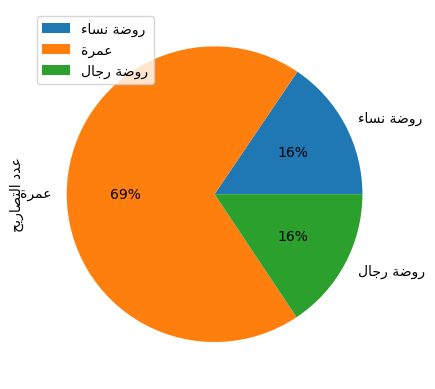

In [51]:
# Reshape 'نوع التصريح' column 
permit_type = df['نوع التصريح'].apply(f)

ylabel = get_display( arabic_reshaper.reshape('عدد التصاريح'))

pie_types =df.groupby(permit_type).sum().plot(kind='pie', y='عدد التصاريح من نسك',autopct='%1.0f%%', ylabel=ylabel)
pie_types;

.تصاريح العمرة هي الأكثر إصداراً من تطبيق نُسُك لعام ١٤٤٤هـ بنسبة ٦٩٪ أي ما يقارب ٢٢ مليون تصريح

### ماهو أقل وأعلى عدد تصريح تم إصداره من تطبيق نُسُك؟ وماهو المتوسط لعدد التصاريح؟

In [17]:
# Calculate descriptive statistics for each numeric variable
df['عدد التصاريح من نسك'].describe()

count      1719.000000
mean      18457.862711
std       22200.683072
min           1.000000
25%        8068.500000
50%       15467.000000
75%       21203.000000
max      160304.000000
Name: عدد التصاريح من نسك, dtype: float64

:عام ١٤٤٤هـ

أقل عدد تصاريح من تطبيق نُسك كان **تصريح واحد** فقط 

أعلى عدد تصاريح من تطبيق نُسك كان **160,304** تصريح

متوسط عدد التصاريح لهذا العام كان **18,457** تصريح

### ماهو نوع التصريح الذي يملك أعلى عدد تصاريح وماهو تاريخ إصداره؟

In [18]:
# retrieving rows by loc method
max_permits = df.loc[df["عدد التصاريح من نسك"] == 160304,:]


# display
max_permits

,عدد التصاريح من نسك,نوع التصريح,الجنس,الشهر,اليوم_
1430,160304,عمرة,ذكر,9,27


كان أعلى عدد تصاريح من تطبيق نُسك هي عدد تصاريح العمرة التي تم إصدارها في يوم ٢٧ رمضان حيث كان عددها ما يقارب ١٦٠ ألف تصريح عمرة للرجال  

In [19]:
b = df.loc[(df["اليوم_"] == 27) & (df["الشهر"] == 9) & (df["نوع التصريح"] == "عمرة")]
b

,عدد التصاريح من نسك,نوع التصريح,الجنس,الشهر,اليوم_
1430,160304,عمرة,ذكر,9,27
1631,75344,عمرة,أنثى,9,27



تصاريح العمرة للنساء في يوم ٢٧ رمضان كانت مايقارب ٧٥ ألف تصريح عمرة

###  هل هناك 

In [20]:
male = df.loc[(df["نوع التصريح"] == "روضة نساء") & (df["الجنس"] == "ذكر")]
male

,عدد التصاريح من نسك,نوع التصريح,الجنس,الشهر,اليوم_
190,41,روضة نساء,ذكر,1,13
191,41,روضة نساء,ذكر,6,25
192,2,روضة نساء,ذكر,7,23
193,5,روضة نساء,ذكر,6,4
194,17,روضة نساء,ذكر,5,14
...,...,...,...,...,...
1707,1,روضة نساء,ذكر,10,17
1708,1,روضة نساء,ذكر,4,19
1709,1,روضة نساء,ذكر,8,24
1710,1,روضة نساء,ذكر,12,3


In [21]:
female = df.loc[(df["نوع التصريح"] == "روضة رجال") & (df["الجنس"] == "أنثى")]
female

,عدد التصاريح من نسك,نوع التصريح,الجنس,الشهر,اليوم_
213,2,روضة رجال,أنثى,1,8
214,5,روضة رجال,أنثى,1,14
215,1,روضة رجال,أنثى,4,1
216,1,روضة رجال,أنثى,10,5
217,1,روضة رجال,أنثى,10,6
...,...,...,...,...,...
1713,1,روضة رجال,أنثى,10,25
1715,1,روضة رجال,أنثى,5,23
1716,1,روضة رجال,أنثى,6,8
1717,1,روضة رجال,أنثى,10,29


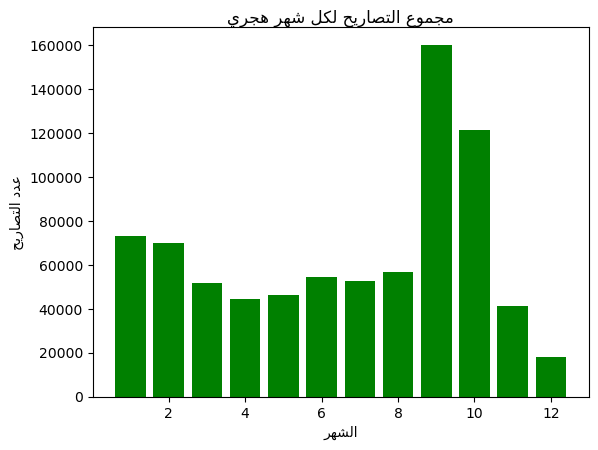

In [23]:
x = df["الشهر"]
y = df["عدد التصاريح من نسك"]
xlbl = get_display( arabic_reshaper.reshape('الشهر'))
ylbl = get_display( arabic_reshaper.reshape('عدد التصاريح'))
label = get_display(arabic_reshaper.reshape("مجموع التصاريح لكل شهر هجري")) 
          
plt.bar(x, y, label='Bar1', color='green')
plt.xlabel(xlbl, fontdict=None, labelpad=None)
plt.ylabel(ylbl, fontdict=None, labelpad=None)
plt.title (label, fontweight=10, pad='2.0')
plt.show()

.أكثر شهر تم إصدار تصاريح فيه كان الشهر التاسع الهجري أي شهر رمضان المبارك بما يقارب ١٦٠ ألف تصريح

.أقل شهر تم إصدار تصاريح فيه كان الشهر الثاني عشر هجرياً أي موسم الحج بما يقارب ٢٠ ألف تصريح

### ماهو نطاق التصاريح لكل جنس؟ وماهو متوسط التصاريح لكل جنس من تطبيق نُسُك؟

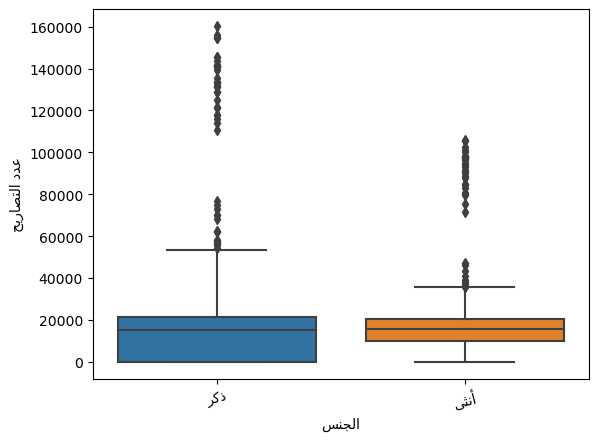

In [24]:

gender = df['الجنس'].apply(f)

sns.boxplot(data=df, x=gender, y='عدد التصاريح من نسك').set(xlabel= get_display( arabic_reshaper.reshape('الجنس')),  
                                                            ylabel= get_display( arabic_reshaper.reshape('عدد التصاريح')))
plt.xticks(rotation=15);

**:بالنسبة إلى تصاريح الرجال**

.نطاق التصاريح من تطبيق نُسُك كانت ما بين ١ إلى ما يقارب الـ ٥٥ ألف تصريح

.ومتوسط التصاريح هو ما يقارب الـ ١٥ ألف تصريح

.٥٠٪ من التصاريح التي تم إصداراها كانت ما بين ١ - ٢٠ ألف تقريباً

**:بالنسبة إلى تصاريح النساء**

.نطاق التصاريح من تطبيق نُسُك كانت ما بين ١ إلى ما يقارب الـ ٤٠ ألف تصريح
 
 .ومتوسط التصاريح هو ما يقارب الـ ١٥ ألف تصريح

. ٥٠٪ من التصاريح التي تم إصدارها كانت ما بين ١٠ آلاف إلى ٢٠ ألف تصريح تقريباً

### ماهو نطاق التصاريح لكل نوع تصريح من تطبيق نُسُك؟ وماهو متوسط التصاريح لكل نوع؟

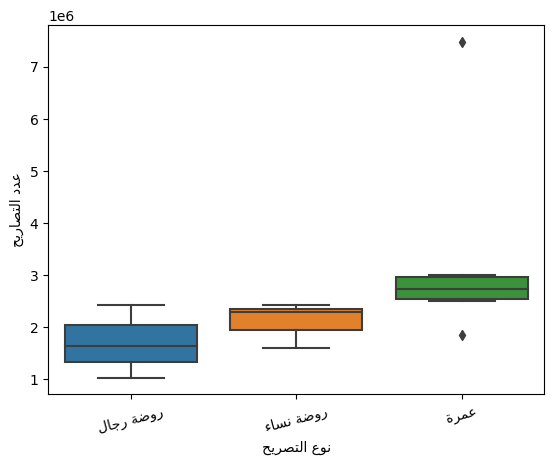

In [25]:

permit_by_month = df.groupby(['الشهر'])['عدد التصاريح من نسك'].sum()


# Plot boxplot chart for 'نوع التصريح'
sns.boxplot(data=df, x=permit_type, y=permit_by_month).set(xlabel= get_display(arabic_reshaper.reshape('نوع التصريح')),  
                                                           ylabel= get_display(arabic_reshaper.reshape('عدد التصاريح')))
plt.xticks(rotation=15);

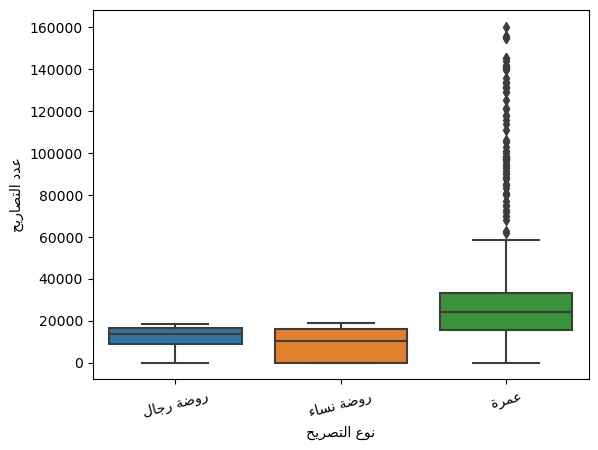

In [26]:
# Reshape 'نوع التصريح' column 
permit_type = df['نوع التصريح'].apply(f)

# Plot boxplot chart for 'نوع التصريح'
sns.boxplot(data=df, x=permit_type, y='عدد التصاريح من نسك').set(xlabel= get_display(arabic_reshaper.reshape('نوع التصريح')),  
                                                                 ylabel= get_display(arabic_reshaper.reshape('عدد التصاريح')))
plt.xticks(rotation=15);

In [27]:
umrah_above_7m = df.loc[(df["نوع التصريح"] == "عمرة") & (df["عدد التصاريح من نسك"] > 7000000)]

**:بالنسبة إلى تصاريح العمرة**

.نطاق التصاريح من تطبيق نُسُك كانت ما بين ١ إلى ما يقارب الـ ١٦٠ ألف تصريح

.ومتوسط التصاريح هو ما يقارب الـ ٢٥ ألف تصريح

.٥٠٪ من تصاريح العمرة التي تم إصداراها كانت ما بين ١٥ ألف إلى ٢٥ ألف تقريباً تصريح

**:بالنسبة إلى تصاريح الروضة**

.نطاق تصاريح روضة النساء من تطبيق نُسُك كانت ما بين ١ إلى ما يقارب الـ ١٩ ألف تصريح بينما نطاق روضة الرجال كانت ما بين ١٠ ألاف إلى ١٩ ألف تقريباً
 
 .ومتوسط تصاريح الروضة للنساء كانت ما يقارب الـ ١٠ آلاف تصريح بينما متوسط تصاريح الروضة للرجال كانت ما يقارب الـ ١٥ آلاف تصريح

. ٥٠٪ من التصاريح التي تم إصدارها لروضة النساء كانت ما بين ١ إلى ١٥ ألف تصريح تقريباً، بينما لروضة الرجال كانت ما بين ١٠ آلاف إلى ١٨ ألف تصريح

In [28]:
permit_by_month

الشهر
1     2426457
2     1847215
3     1647892
4     2294234
5     2429376
6     2501259
7     2655260
8     3003168
9     7479572
10    2813663
11    1596610
12    1034360
Name: عدد التصاريح من نسك, dtype: int64

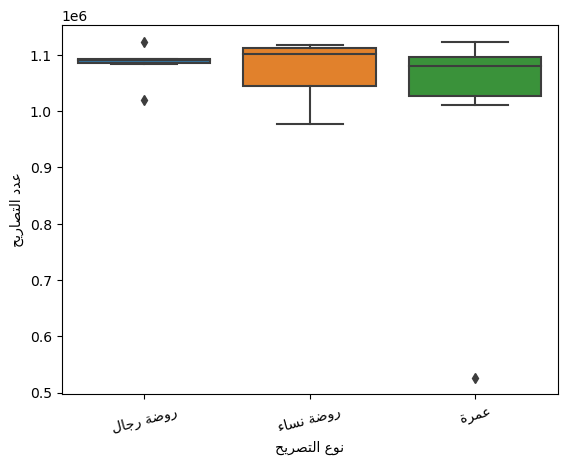

In [29]:
# Reshape 'نوع التصريح' column 
permit_type = df['نوع التصريح'].apply(f)


permit_by_day = df.groupby(['اليوم_'])['عدد التصاريح من نسك'].sum()


# Plot boxplot chart for 'نوع التصريح'
sns.boxplot(data=df, x=permit_type, y=permit_by_day).set(xlabel= get_display(arabic_reshaper.reshape('نوع التصريح')),  
                                                           ylabel= get_display(arabic_reshaper.reshape('عدد التصاريح')))
plt.xticks(rotation=15);

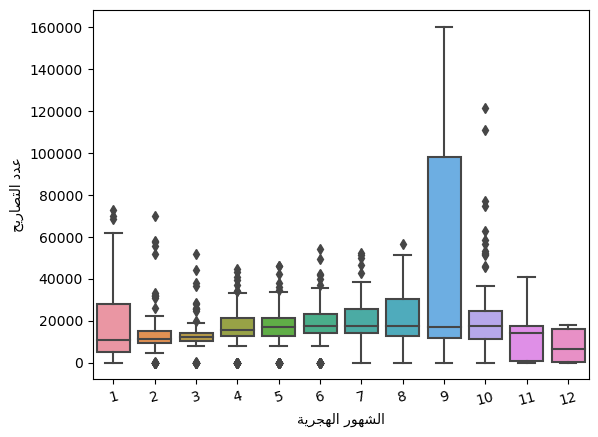

In [30]:

sns.boxplot(data=df, x='الشهر', y='عدد التصاريح من نسك').set(xlabel= get_display( arabic_reshaper.reshape('الشهور الهجرية')),  
                                                            ylabel= get_display( arabic_reshaper.reshape('عدد التصاريح')))
plt.xticks(rotation=15);

### بالنسبة إلى تصاريح العمرة، من الأكثر إصداراً للتصاريح الرجال أم النساء؟

In [31]:
umrah_  = df.loc[(df["نوع التصريح"] == "عمرة")]

الجنس
أنثى     8984516
ذكر     12850382
Name: عدد التصاريح من نسك, dtype: int64


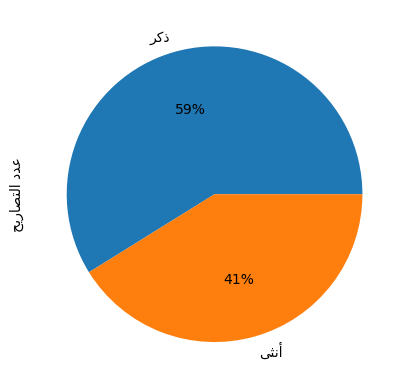

In [32]:
umrah_gender = umrah_.groupby(['الجنس'])['عدد التصاريح من نسك'].sum()
print(umrah_gender)

umrah_gender = umrah_.groupby(gender)['عدد التصاريح من نسك'].sum()
ylabel= get_display( arabic_reshaper.reshape('عدد التصاريح'))
umrah_gender.plot(kind='pie', autopct='%1.0f%%', ylabel=ylabel);

.نلاحظ أنَّ الرجال أكثر إصداراً لتصاريح العمرة لعام ١٤٤٤هـ من تطبيق نُسُك بنسبة ٥٩٪ أي بما يقارب الـ ١٣ مليون تصريح  

### ماهو أكثر وأقل شهر هجري يتم فيه إصدار تصاريح العمرة من تطبيق نُسُك لعام ١٤٤٤هـ؟

الشهر
1     1896596
2     1226744
3      942147
4     1432825
5     1494170
6     1538829
7     1701044
8     2025399
9     6627488
10    2000123
11     757197
12     192336
Name: عدد التصاريح من نسك, dtype: int64


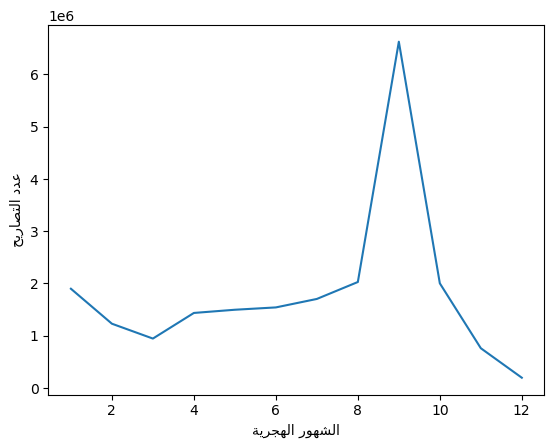

In [33]:
# Group umrah_ dhttp://localhost:8888/notebooks/Desktop/my_projects/%D8%AA%D8%AD%D9%84%D9%8A%D9%84%20%D8%A8%D9%8A%D8%A7%D9%86%D8%A7%D8%AA%20%D8%A7%D9%84%D8%AD%D8%AC%20%D9%88%D8%A7%D9%84%D8%B9%D9%85%D8%B1%D8%A9/%D8%AA%D8%B5%D8%A7%D8%B1%D9%8A%D8%AD%20%D8%AA%D8%B7%D8%A8%D9%8A%D9%82%20%D9%86%D9%8F%D8%B3%D9%8F%D9%83/%D9%85%D8%B4%D8%B1%D9%88%D8%B9%20%D8%AA%D8%AD%D9%84%D9%8A%D9%84%20%D8%A8%D9%8A%D8%A7%D9%86%D8%A7%D8%AA%20%D8%AA%D8%B5%D8%A7%D8%B1%D9%8A%D8%AD%20%D8%AA%D8%B7%D8%A8%D9%8A%D9%82%20%D9%86%D9%8F%D8%B3%D9%8F%D9%83%20%D9%84%D8%B9%D8%A7%D9%85%20%D9%A1%D9%A4%D9%A4%D9%A4%D9%87.ipynb#%D9%85%D8%A7%D9%87%D9%88-%D8%A3%D9%83%D8%AB%D8%B1-%D9%88%D8%A3%D9%82%D9%84-%D8%B4%D9%87%D8%B1-%D9%87%D8%AC%D8%B1%D9%8A-%D9%8A%D8%AA%D9%85-%D9%81%D9%8A%D9%87-%D8%A5%D8%B5%D8%AF%D8%A7%D8%B1-%D8%AA%D8%B5%D8%A7%D8%B1%D9%8A%D8%AD-%D8%A7%D9%84%D8%B9%D9%85%D8%B1%D8%A9-%D9%85%D9%86-%D8%AA%D8%B7%D8%A8%D9%8A%D9%82-%D9%86%D9%8F%D8%B3%D9%8F%D9%83-%D9%84%D8%B9%D8%A7%D9%85-%D9%A1%D9%A4%D9%A4%D9%A4%D9%87%D9%80%D8%9Fataframe based on month and sum the permits count using .groupby method
umrah_months = umrah_.groupby(['الشهر'])['عدد التصاريح من نسك'].sum()
print(umrah_months)

# x-axis and y-axis
xlabel= get_display( arabic_reshaper.reshape('الشهور الهجرية'))
ylabel= get_display( arabic_reshaper.reshape('عدد التصاريح'))

# Visualize Hijri months depending on permits count using line chart
umrah_months.plot(kind='line', xlabel=xlabel ,ylabel=ylabel);

أكثر شهر هجري يتم فيه إصدار تصاريح العمرة لعام ١٤٤٤هـ من تطبيق نُسُك كان الشهر التاسع هجرياً (رمضان المبارك)بما يقارب الـ ٧ مليون تصريح عمرة

وأقل شهر هجري يتم فيه إصدار تصاريح العمرة كان الشهر الثاني عشر(ذو الحجة) حيث كان أقل من مليون تصريح عمرة 

### ماهي حالة عدد تصاريح العمرة في أيام شهر رمضان؟ 

اليوم_
1     208406
2     215414
3     217260
4     204055
5     203755
6     210600
7     215432
8     231536
9     246455
10    235001
11    226607
12    225154
13    232623
14    234345
15    237486
16    230571
17    233251
18    225165
19    239118
20    237484
21    238984
22    233971
23    226521
24    238998
25    231674
26    235257
27    235648
28    236838
29    239879
Name: عدد التصاريح من نسك, dtype: int64


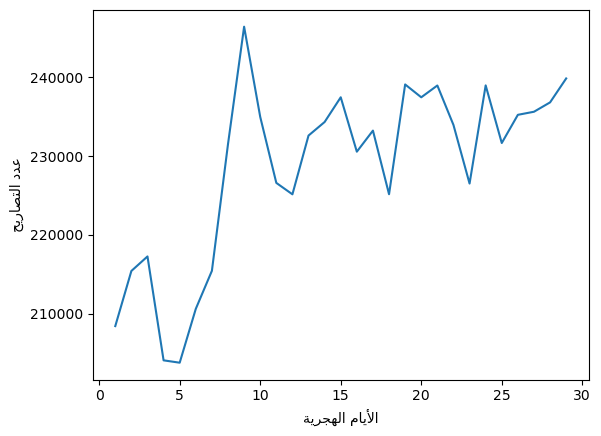

In [34]:
umrah_ramadan = umrah_.loc[(umrah_['الشهر'] == 9 )]
date = umrah_ramadan.groupby(['اليوم_'])['عدد التصاريح من نسك'].sum()
print(date)

xlabel= get_display( arabic_reshaper.reshape('الأيام الهجرية'))
ylabel= get_display( arabic_reshaper.reshape('عدد التصاريح'))
date.plot(kind='line', xlabel=xlabel ,ylabel=ylabel);

:نلاحظ انخفاض وارتفاع في عدد تصاريح العمرة لشهر رمضان ١٤٤٤هـ من تطبيق نُسُك، حيث أن

.أقل عدد تصاريح عمرة تم إصدارها في شهر رمضان كانت في اليوم الخامس بما يقل عن ٢١٠ الآف تصريح 

.وأعلى عدد تصاريح عمرة تم إصدارها في شهر رمضان كانت في اليوم التاسع بما يقارب الـ ٢٤٦ ألف تصريح


### ماهو أقل وأعلى عدد تصاريح العمرة؟ وماهو متوسطها؟ 

In [35]:
umrah_['عدد التصاريح من نسك'].sum()

21834898

In [36]:
umrah_['عدد التصاريح من نسك'].min()

19

In [37]:
umrah_['عدد التصاريح من نسك'].max()

160304

In [38]:
umrah_['عدد التصاريح من نسك'].median()

24200.0

.مجموع تصاريح العمرة مايقارب ٢٢ مليون تصريح

.نطاق تصاريح العمرة ما بين ١٩ إلى ١٦٠.٣٠٤ تصريح

.متوسط تصاريح العمرة لعام ١٤٤٤هـ من تطبيق نُسُك كان ٢٤.٢٠٠ تصريح

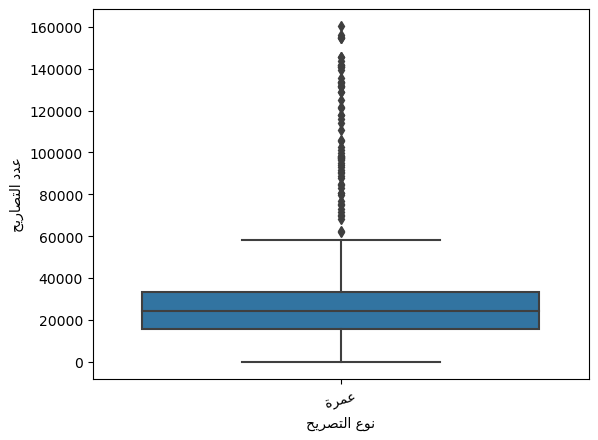

In [39]:

only_umrah = umrah_['نوع التصريح'].apply(f)

sns.boxplot(data=umrah_, x=only_umrah, y='عدد التصاريح من نسك').set(xlabel= get_display( arabic_reshaper.reshape('نوع التصريح')),  
                                                                 ylabel= get_display( arabic_reshaper.reshape('عدد التصاريح')))
plt.xticks(rotation=15);

### بالنسبة إلى تصاريح زيارة الروضة الشريفة، من الأكثر إصداراً للتصاريح الرجال أم النساء؟

In [40]:
raudhah_visits = df.loc[(df['نوع التصريح'] != 'عمرة')]

الجنس
أنثى    4928307
ذكر     4965861
Name: عدد التصاريح من نسك, dtype: int64


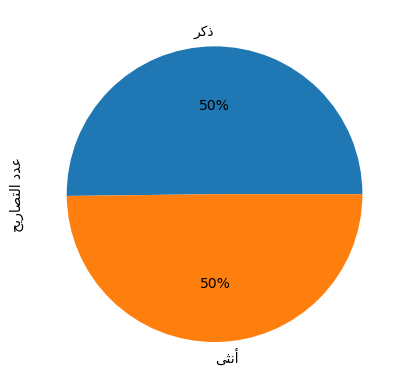

In [45]:
raudhah_gender = raudhah_visits.groupby(['الجنس'])['عدد التصاريح من نسك'].sum()
print(raudhah_gender)

raudhah_gender = raudhah_visits.groupby(gender)['عدد التصاريح من نسك'].sum()
raudhah_gender.plot(kind='pie', autopct='%1.0f%%', ylabel=ylabel);

نلاحظ تساوي نسبة تصاريح زيارة الروضة الشريفة ما بين الرجال والنساء وقد يزيد عدد تصاريح الرجال عن النساء بعدد قليل بما  يقارب ٣٨ ألف (٠.٧٦٪) 

### ماهو أكثر وأقل شهر هجري يتم فيه إصدار تصاريح زيارة الروضة الشريفة من تطبيق نُسُك لعام ١٤٤٤هـ؟

الشهر
1     529861
2     620471
3     705745
4     861409
5     935206
6     962430
7     954216
8     977769
9     852084
10    813540
11    839413
12    842024
Name: عدد التصاريح من نسك, dtype: int64


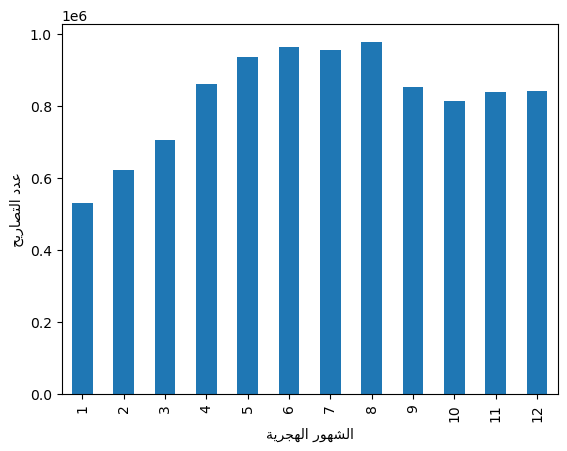

In [61]:
# Group raudhah_visits by Hijiri months and sum permits count
raudhah_months = raudhah_visits.groupby(['الشهر'])['عدد التصاريح من نسك'].sum()
print(raudhah_months)

# x-axis and y-axis
xlabel= get_display( arabic_reshaper.reshape('الشهور الهجرية'))
ylabel= get_display( arabic_reshaper.reshape('عدد التصاريح'))

# Visualize Hijri months depending on permits count using bar chart
raudhah_months.plot(kind='bar', xlabel=xlabel ,ylabel=ylabel);

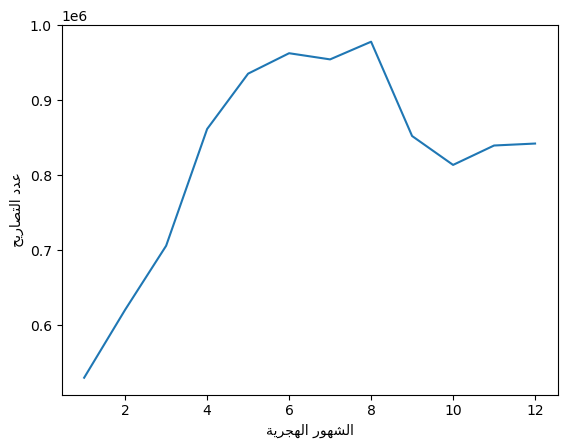

In [63]:
# Visualize Hijri months depending on permits count using line chart
raudhah_months.plot(kind='line', xlabel=xlabel ,ylabel=ylabel);

## الاستنتاج

.تم إصدار ٣٢ مليون تصريح من تطبيق نُسُك لعام ١٤٤٤هـ وتعتبر تصاريح العمرة هي الأكثر إصداراً بنسبة ٦٩٪ أي ما يقارب ٢٢ مليون تصريح عمرة

`:تصاريح العمرة`

.الرجال أكثر إصداراً لتصاريح العمرة لعام ١٤٤٤هـ من تطبيق نُسُك بنسبة ٥٩٪ أي بما يقارب الـ ١٣ مليون تصريح، والنساء ما يقارب ٩ مليون أي ٤١٪ من تصاريح العمرة

.أكثر شهر هجري تم فيه إصدار تصاريح العمرة لعام ١٤٤٤هـ من تطبيق نُسُك كان الشهر التاسع هجرياً (رمضان المبارك) بما يقارب الـ ٧ مليون تصريح عمرة

.أقل شهر هجري تم فيه إصدار تصاريح العمرة كان الشهر الثاني عشر هجرياً (ذو الحجة) حيث كان أقل من مليون تصريح عمرة


.أعلى عدد تصاريح تم إصداره من تطبيق نُسُك لعام ١٤٤٤هـ كان ١٦٠ ألف تصريح عمرة -رجال- في يوم ٢٧ من رمضان  


`:تصاريح زيارة الروضة الشريفة`

.الرجال والنساء متساويين في نسبة إصدارهم لتصاريح زيارة الروضة الشريفة لعام ١٤٤٤هـ من تطبيق نُسُك بنسبة ٥٠٪ لكلاً منهما، وقد يزيد عدد تصاريح الرجال عن النساء بعدد قليل ما يقارب الـ ٣٨ ألف تصريح (٠.٧٦٪)

.أكثر شهر هجري تم فيه إصدار تصاريح زيارة الروضة الشريفة كان الشهر الثامن هجرياً بما يقارب الـ ٩٨ ألف تصريح، والأقل هو الشهر الأول هجرياً بما يقارب الـ ٥٣ ألف تصريح

